In [20]:
### A Pluto.jl notebook ###
# v0.12.11
using Markdown
using InteractiveUtils



# Project: book shelves

**STMO**

2020-2021

Project by $student_names




## Outline

In this project, we will arange my collection of books in my fancy bookshelf. My bookshelf consists of $(length(shelves)) shelves, each with a position (`pos`), a `width` and a `height` (everything is in meters). These shelves are given as a list of `NamedTuple`s.



In [21]:
shelves


31-element Array{NamedTuple{(:pos, :width, :height),Tuple{Tuple{Float64,Float64},Float64,Float64}},1}:
 (pos = (0.0, 0.0), width = 0.7690727178631521, height = 0.4999432280876094)
 (pos = (0.7690727178631521, 0.0), width = 0.4185346638079346, height = 0.4999432280876094)
 (pos = (1.1876073816710866, 0.0), width = 0.7586815382798033, height = 0.4999432280876094)
 (pos = (1.94628891995089, 0.0), width = 0.4786524649518867, height = 0.4999432280876094)
 (pos = (2.4249413849027768, 0.0), width = 0.5750586150972232, height = 0.4999432280876094)
 (pos = (0.0, 0.4999432280876094), width = 0.7153527005217186, height = 0.39927015318563314)
 (pos = (0.7153527005217186, 0.4999432280876094), width = 0.5226002240524519, height = 0.39927015318563314)
 (pos = (1.2379529245741705, 0.4999432280876094), width = 0.69050618338882, height = 0.39927015318563314)
 (pos = (1.9284591079629905, 0.4999432280876094), width = 0.7461023670879272, height = 0.39927015318563314)
 (pos = (2.6745614750509175, 0.49994322

For example:


In [62]:
first_shelve = first(shelves)


(pos = (0.0, 0.0), width = 0.7690727178631521, height = 0.4999432280876094)

In [63]:
first_shelve.pos  # position


(0.0, 0.0)

In [64]:
first_shelve.width  # width


0.7690727178631521

In [65]:
first_shelve.height  # height


0.4999432280876094

We can plot the bookshelf.


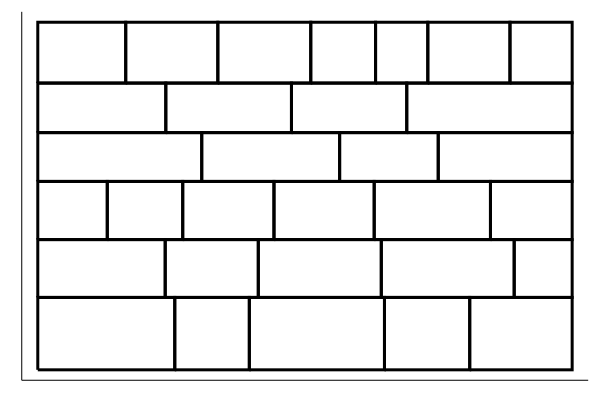

In [66]:
plot_shelf()


Looks a bit empty. Luckily we have $(length(books)) books to fill them with! Each book has a width, height and a color.


In [67]:
books


300-element Array{NamedTuple{(:width, :height, :color),Tuple{Float64,Float64,RGB{Float64}}},1}:
 (width = 0.035, height = 0.4, color = RGB{Float64}(0.14627279974917284,0.4348142597185558,0.958320515587751))
 (width = 0.07, height = 0.4, color = RGB{Float64}(0.9210578741778204,0.9824034709940435,0.061370437081063045))
 (width = 0.035, height = 0.29, color = RGB{Float64}(0.17457981189951077,0.29668255102898167,0.34648863068145097))
 (width = 0.115, height = 0.35, color = RGB{Float64}(0.27335919124284414,0.9966780992150854,0.381342465793711))
 (width = 0.025, height = 0.29, color = RGB{Float64}(0.46446449587141836,0.22921027695056928,0.42128135367212205))
 (width = 0.025, height = 0.2, color = RGB{Float64}(0.5520736996457836,0.19051937663730079,0.20476950508064862))
 (width = 0.105, height = 0.21, color = RGB{Float64}(0.43598254030811656,0.2418941230355125,0.03538708748781394))
 (width = 0.075, height = 0.31, color = RGB{Float64}(0.2724418962074182,0.3737632666136945,0.12239864846552417))

Similarly, take a look at a randomly chosen book:


In [68]:
a_book = rand(books)


(width = 0.1, height = 0.3, color = RGB{Float64}(0.023293157919498375,0.09125688311733504,0.7729711015862972))

In [69]:
a_book.color


In [70]:
a_book.width


0.1

In [71]:
a_book.height


0.3


The goal of this project is to find an optimal placement of the books in the different shelves. These placements have natural constraints:
- the height of a book can not exceed the height of the shelf it is placed on;
- the sum of all the widths of the books on a shelf cannot exceed that shelf's width.

In addition, we want to place the books in an aesthetically pleasing way: books placed to each other have to be similar in color scheme. To this end, we can use the sums of the difference scores computed by the function `colordiff`. For example:



In [72]:
c1, c2 = RGB(0.2, 0.3, 0.7), RGB(0.7, 0.5, 0.6)


(RGB{Float64}(0.2,0.3,0.7), RGB{Float64}(0.7,0.5,0.6))

In [73]:
colordiff(c1, c2)


33.41617261263215

In [74]:
some_book_colors = [book[:color] for book in books[1:5]]


In [22]:
function sum_of_colordiffs(colors)
	total = 0.0
	n_colors = length(colors)
	# fewer than two books, return 0.0
	n_colors < 2 && return total
	for i in 2:n_colors
		c1, c2 = colors[i-1], colors[i]
		total += colordiff(c1, c2)
	end
	return total
end


sum_of_colordiffs (generic function with 1 method)

In [76]:
sum_of_colordiffs(some_book_colors)


304.15183152256486

Let's compare with a different order of the colors.


In [77]:
book_colors_reordered = some_book_colors[[5, 3, 1, 4, 2]]


In [78]:
sum_of_colordiffs(book_colors_reordered)


138.38044690020402

So your goal is find a **valid** placement of the books that minimizes the sum of all color differences of adjacent books. You also have minize the unoccupied amount of space. **Per square meter shelf area that is free, you pay a penalty of $gappenalty**. So leave as few free space as possible.

Let us generate a naive solution, just placing the books in order that they appear in the list.



In [23]:
mysolution = generate_naive_solution()


Dict{Int64,Array{Int64,1}} with 31 entries:
  18 => [145, 147, 150, 152, 153, 154, 155, 159, 164]
  30 => [229, 230, 231, 232, 240, 244]
  2  => [13, 14, 15, 16, 17, 18, 19, 33]
  16 => [116, 117, 118, 119, 122]
  11 => [44, 48, 79, 84, 85, 86, 97]
  21 => [127, 128, 157, 182, 184, 186, 187, 188, 204]
  7  => [55, 56, 57, 58, 59, 61]
  9  => [70, 71, 72, 73, 74, 75, 77, 78, 80, 134]
  25 => [123, 124, 125, 132, 135, 142, 149]
  10 => [81, 82, 83, 96]
  26 => [144, 146, 151, 156, 161, 163, 167, 174, 236]
  29 => [224, 227, 228, 239]
  19 => [160, 162, 165, 166, 168, 169, 170]
  17 => [120, 121, 126, 129, 130, 131, 133, 136, 137, 138, 139, 140, 141, 143, …
  8  => [62, 63, 64, 65, 66, 67, 68, 69, 76]
  22 => [189, 191, 194, 195, 197, 198, 199, 200, 203]
  6  => [43, 45, 47, 49, 50, 51, 52, 53, 54, 60]
  24 => [215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 234]
  4  => [30, 31, 32, 34, 35]
  3  => [20, 21, 22, 23, 24, 26, 27, 28, 29]
  28 => [201, 210, 211, 212, 238]
  5  => [36,


The structure of the solution is a dictionary (e.g., `Dict(1 => [3, 4, 5]...)`) containing the shelves' ids as keys and the a list of book ids as the values. In this solution, we used $(sum(length.(values(mysolution)))) of the $(length(books)) books.

We can use the function `isvalidsolution` to check if this solution is valid.



In [24]:
isvalidsolution(mysolution) 


true

We can easily compute the objective:


In [25]:
compute_objective(mysolution)


11628.673229170467

Of course, we can visualise the solution.


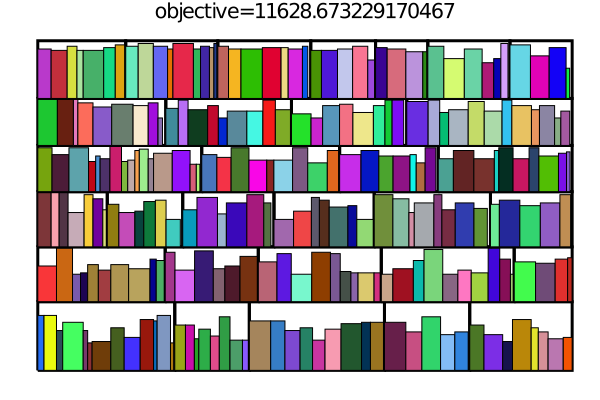

In [26]:
show_solution(mysolution)



## Assignments

Use your knowledge of optimization to generate the best solution that you can. Send your notebook to [me](michiel.stock@ugent.be), both as Pluto notebook file (.jl) and as **PDF or HTML file**. Also send your solution as a JSON file. Use the function `save_solution` to generate this file. Use your name(s) in the file name!

You will be graded on two accounts:
- the quality of your solution relative to the other students;
- the originality and quality of your approach you used, including writing tidy code, adding documentation and comments.

You can do this project alone or in pairs. The deadline is **Friday 4 December**.



In [27]:
student_names = "Kirsten Van Huffel & Tristan Vanneste"


"Kirsten Van Huffel & Tristan Vanneste"

#### Note: I changed to compute_objective function so it can handle invalid solutions. The invalid solutions are taken into account by  adding a large penalty. The final solution after searching with simulated annealing will thus always be valid when correct parameters are chosen.

#### 1. Uploading required packages

In [28]:
using Random

#### 2. Defining some functions

2.1 Function to generate neighboring design

In [29]:
"""

This function calculates a random neighbor to a specific book shelf design. 
A random neighbor is 
- a book shelf in which two books are flipped 
OR
- a book shelf in which a book on a shelf is replaced with a book that was not yet present in the shelf.
Remark: this neighbor is not perse a valid design: invalid designs will be penalized during the search procedure to 
take this into account.

"""

function generate_neighbor(design, shelves_index)
    # Pick a random shelve and a random book on this shelf
    switch_shelve1_index = rand(shelves_index)
    shelf1_book_ids = design[switch_shelve1_index]
    switch_book1_index = rand(shelf1_book_ids) 
    
    books_used = []
    books_all = 1:300
    for shelves_design in design
        books_used = vcat(books_used, shelves_design[2])
    end
    books_not_used = setdiff(books_all, books_used)
    q = length(books_not_used)/length(books_all)
    
    # Possibility 1: use NEW book (not yet present in book shelf)
    if rand() < q # we could change this
        switch_book2_index = rand(books_not_used)
        global design[switch_shelve1_index][findall(x -> x==switch_book1_index , design[switch_shelve1_index])[1]] = switch_book2_index

    # Possibility 2: switch with book already present in book shelf)
    # Pick another random shelf and another random book on this shelf
    else
        switch_shelve2_index = rand(shelves_index)
        shelf2_book_ids = design[switch_shelve2_index]
        switch_book2_index = rand(shelf2_book_ids) 
      
        # Switch the two books in position
        global design[switch_shelve1_index][findall(x -> x==switch_book1_index , design[switch_shelve1_index])[1]] = switch_book2_index
        global design[switch_shelve2_index][findall(x -> x==switch_book2_index , design[switch_shelve2_index])[1]] = switch_book1_index
    end
    
    return design
end

generate_neighbor (generic function with 1 method)

2.2 Function to calculate penalty for invalid solution

In [30]:
"""

This function calculates a penalty that is proportional to how much constraints the solution violates.
        A valid solution will have a zero penalty.

"""
function isvalidsolution_penalty(solution)
    books_used = Set(1:length(books))
    penalty = 0
    for s_id in keys(solution)
        
        shelf = shelves[s_id]
        books_ids = solution[s_id]
        
        # check if book ids are valid
        if issubset(books_ids, books_used) 
            penalty += 0
        else
            penalty += 10000
        end
        setdiff!(books_used, books_ids)
        
        # check if books are not used on other self
        books_on_shelf = books[books_ids]
        
        # check heights
        s_h = shelf.height
        if all((b.height for b in books_on_shelf) .≤ s_h)
            penalty += 0
        else
            penalty += 10000
        end
    
        # check widths
        s_w = shelf.width
        
        if sum((b.width for b in books_on_shelf)) ≤ s_w  
            penalty += 0
        else  
            penalty += 10000
        end      
    end
    return penalty
end	


isvalidsolution_penalty

2.3 Function implementing the simulated annealing algorithm

In [31]:
"""

This function implements the simulated annealing (SA) algorithm for the bookshelf problem.
During SA, a high starting temperature (T_initial) is gradually decreased to an end temperature (T_end).
At each temperature T, a number of designs is generated (amount=iterations). 
Each newly generated design is a neighbor of a previously accepted design. 
For each design, the objective value is compared to the previous design:
- If the objective value increases, the design is accepted
- If the objective value decreases, the design is only accepted with a chance p=(delta_objective/T)

Note1: p decreases with a decreasing T, favoring exploration at high T and exploitation at low T.

Note2: We programmed the SA algo as such that the penalty increases over time.

"""

function simulated_annealing(design_initial, T_initial, T_end, iterations, alpha, shelves_index)
    
    # Initialize temperature and design
    T = T_initial; global design = deepcopy(design_initial)
    
    while T > T_end
        
        for i in iterations
            # Compute objective of current design
            objective_current = compute_objective(design) + 1/T*150*isvalidsolution_penalty(design)
            @show objective_current
            
            # Generate neighbor of current design and calculate its objective
            # A penalty is added when the solution is not valid: amount proportional to deviation from valid design
            
            design_neighbor = generate_neighbor(deepcopy(design), shelves_index)
            objective_new = deepcopy(compute_objective(design_neighbor) + 1/T*150*isvalidsolution_penalty(design_neighbor))
             
            
            # Calculate difference in objective
            delta_objective = objective_new - objective_current
            
            # Accept design if objective has improved
            if delta_objective < 0
                design = deepcopy(design_neighbor)
                objective_current = compute_objective(design_neighbor) + 1/T*150*isvalidsolution_penalty(design_neighbor)
                global objective_optimal = deepcopy(objective_current)
            
            # Accept design with chance exp(delta_objective/T) if objective has not improved
            else
                q = rand(1)[1]
                if q < exp(-delta_objective/T)
                    design = deepcopy(design_neighbor)
                    println("explore!")
                end
            end
        end
        
        # Annealing schedule
        T = T*alpha

        
    end
    return design, objective_optimal
end     

simulated_annealing (generic function with 1 method)

#### 3.1 Create appropriate starting design for SA 
- Put books in order so good color matches follow each other

In [72]:
# Arrange books in an order so books with best color match follow each other up
book_index = 1
books_used = []

for i in 1:300
    c1 = books[book_index].color
    color_difference = 100
    books_used = append!(books_used, book_index)
#     println(books_used)
    books_notused = setdiff!(collect(1:300), books_used)
    for j in 1:length(books_notused)
        c2 = books[books_notused[j]].color
        color_difference_new = colordiff(c1, c2)
        if color_difference_new < color_difference
            book_index = books_notused[j]
            color_difference = color_difference_new 
        end
    end
end

books_idealcolor_index = books_used
books_idealcolor_order = books[books_idealcolor_index]
#books_idealcolor_order_reverse = reverse(books_idealcolor_order)
[book[:color] for book in books_idealcolor_order]

- Put ordered books in the shelves!

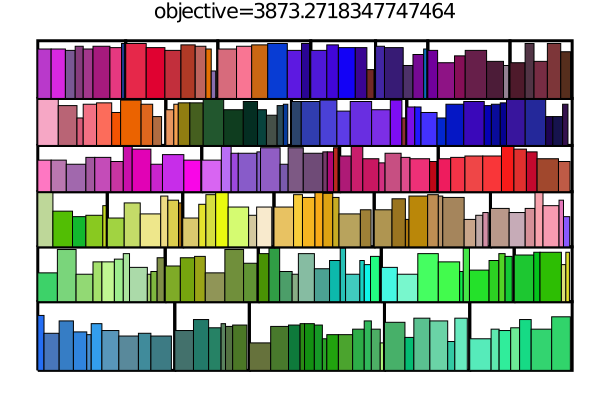

In [73]:
function generate_solution()
	# keep track of all books used
	books_used = Set{Int}()
	solution = Dict{Int,Vector{Int}}()
	# for all shelves, go over the books,
	# if there is room, add it to the selve
	for (sh_id, shelf) in enumerate(shelves)
		solution[sh_id] = []
		h_shelf = shelf.height
		w_shelf = shelf.width
		for i in 1:300
            book = books_idealcolor_order[i]
            book_id = books_idealcolor_index[i]
			# check if book is not yet used
			book_id in books_used && continue
			w_book, h_book = book.width, book.height
			# check height of book
 			h_book > h_shelf && continue
			# if still room, add book
			if w_book ≤ w_shelf
				push!(solution[sh_id], book_id)
				push!(books_used, book_id)
				w_shelf -= w_book
			end
		end
	end
	return solution
end
solution_idealcolororder = generate_solution()
show_solution(solution_idealcolororder)

#### 3.2 Executing search procedure with simulated annealing to improve previous solution

In [66]:
design_initial= solution_idealcolororder
T_initial = 5
T_end = 0.00001
iterations = 10000
alpha = 0.99999
shelves_index = 1:size(shelves)[1]

design, objective_optimal = simulated_annealing(design_initial, T_initial, T_end, iterations, alpha, shelves_index)

@show objective_optimal

objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
explore!
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
objective_current = 4181.097266472721
explore!
objective_current = 4181.097266472721
objective_current = 4181.0972664

Excessive output truncated after 524302 bytes.

4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
explore!
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 4115.567498389708
objective_current = 411

3556.976765466979

In [67]:
mysolution = design;

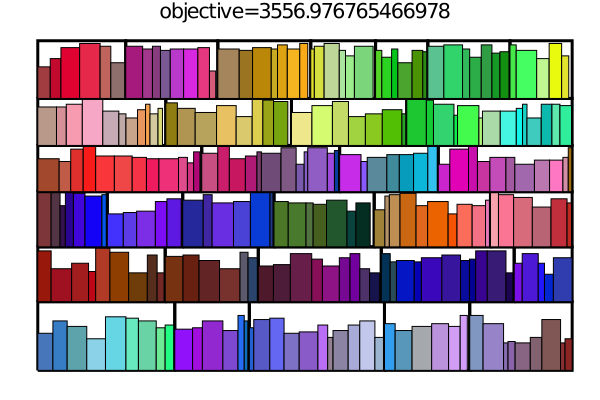

In [68]:
show_solution(mysolution)

In [38]:
isvalidsolution(mysolution)

true

In [240]:
savesolution("mycleversoluton_3445.json", mysolution)
loadsolution("mycleversoluton_3445.json")

Dict{Int64,Array{Int64,1}} with 31 entries:
  18 => [274, 22, 184, 196, 119, 5, 82, 155, 68, 204, 270, 191]
  30 => [170, 86, 57, 131, 79, 30]
  2  => [36, 102, 292, 23, 259, 105]
  16 => [157, 247, 26, 48, 41, 110, 212]
  11 => [146, 97, 255, 127, 242]
  21 => [179, 133, 62, 207, 182, 46, 295, 164, 253]
  7  => [186, 19, 108, 120, 203, 13]
  26 => [129, 96, 190, 161, 124, 195, 10]
  25 => [188, 94, 112, 66, 47, 185, 63, 167]
  10 => [183, 181, 136, 290, 40]
  9  => [276, 233, 118, 246, 202, 271, 284, 288, 163, 135]
  29 => [268, 99, 55, 123, 237]
  19 => [153, 80, 166, 232, 76, 31, 17, 267]
  17 => [216, 261, 56, 88, 234, 24, 14, 235, 205, 160, 143]
  8  => [258, 201, 115, 289, 171, 109, 266, 72, 280, 92, 176, 168]
  22 => [296, 50, 87, 8, 27, 194, 177, 89, 67, 3, 293]
  6  => [220, 132, 116, 73, 107, 286, 158, 285, 139, 81, 272]
  24 => [214, 9, 256, 197, 162, 98, 240, 106, 54, 269, 117, 38, 49, 275]
  4  => [4, 283, 142, 217, 229, 231]
  3  => [243, 150, 90, 239, 251, 287, 15, 165, 

In [234]:
# How many books did we use?
som=0
for i in 1:length(design)
    som += length(design[i])
end
@show som;

som = 253


In [235]:
# Which books were used?
books_used = []
for shelves_design in design
    books_used = vcat(books_used, shelves_design[2])
    
end

@show sort(books_used);

sort(books_used) = Any[2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 112, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 217, 219, 220, 222, 224, 226, 227, 229, 230, 231, 232, 234, 235, 236, 238, 239, 240, 241, 242, 243, 245, 246, 247, 248, 24


## Utilities

Functions that are useful. Nothing for you to change here.



In [8]:
const gappenalty = 1_000


1000

In [9]:
using Colors, Plots, RecipesBase, Statistics  # install these if you don't have them


In [10]:
"""Check if a solution is valid."""
function isvalidsolution(solution)
	books_used = Set(1:length(books))
	for s_id in keys(solution)
		shelf = shelves[s_id]
		books_ids = solution[s_id]
		# check if book ids are valid
		@assert issubset(books_ids, books_used) "Error in book ids"
		setdiff!(books_used, books_ids)
		# check if books are not used on other self
		books_on_shelf = books[books_ids]
		# check heights
		s_h = shelf.height
		@assert all((b.height for b in books_on_shelf) .≤ s_h) "Books exceed heigth at shelf $s_id"
		# check widths
		s_w = shelf.width
		@assert sum((b.width for b in books_on_shelf)) ≤ s_w "Total book with exceeds width of self $s_id"
	end
	return true
end	


isvalidsolution

In [11]:
"""Compute the objective of your solution (adjusted: NO errors when not valid)"""
function compute_objective(solution; gappenalty=gappenalty)
# 	isvalidsolution(solution)
	obj = 0.0
	for s_id in keys(solution)
		shelf = shelves[s_id]
		books_ids = solution[s_id]
		books_on_shelf = books[books_ids]
		books_surface = sum((b.width * b.height for b in books_on_shelf))
		shelf_surface = shelf.width * shelf.height
		obj += gappenalty * (shelf_surface - books_surface)
		length(books_on_shelf) > 1 || continue
		for i in 1:length(books_on_shelf)-1
			obj += colordiff(books_on_shelf[i].color, books_on_shelf[i+1].color)
		end
	end
	return obj
end


compute_objective

In [12]:
"""Plot only the selve, bit empty."""
function plot_shelf()
	pl = plot()
	for (pos, w, h) in shelves
		plot!(Square(pos, w, h), lw=3)
	end
	pl
end


plot_shelf

In [13]:
"""Plots the solution. You can change stuff, e.g., adding keyword
arguments such as `title=\"my solution\"`"""
function show_solution(solution; kwargs...)
	pl = plot(title="objective=$(compute_objective(solution))", axis=([], false); kwargs...)
	for (s_id, (pos, w, h)) in enumerate(shelves)
		x, y = pos
		plot!(Square(pos, w, h), lw=3)
		for b_id in solution[s_id]
			book = books[b_id]
			w, h = book.width, book.height
			plot!(Square((x, y), w, h), book.color)
			x += w
		end
	end
	return pl
end


show_solution

In [14]:
"""Stores `solution` to the `fname`."""
function savesolution(fname, solution::Dict)
	open(fname, "w") do fh 
		write(fh, JSON.json(solution))
	end
end


savesolution

In [15]:
"""Loads a solution from a file `fname`, stored in JSON. Raises an error if invalid."""
function loadsolution(fname)
	solution = JSON.read(fname, String) |> JSON.parse
	solution = Dict(parse(Int, k) => [v...] for (k, v) in solution)
	@assert isvalidsolution(solution) "Solution is not valid!"
	return solution
end


loadsolution

In [16]:
struct Square
	pos
	width
	heigth
end


In [17]:
@recipe function f(s::Square, color = nothing)
    linecolor   --> :black
    seriestype  :=  :shape
	label := ""
    fillalpha --> (color isa Nothing ? 0.0 : 1.0)
	fillcolor := color
	xticks := []
	yticks := []
   	[s.pos[1], s.pos[1]+s.width, s.pos[1]+s.width, s.pos[1]], [s.pos[2], s.pos[2], s.pos[2]+s.heigth, s.pos[2]+s.heigth]
end


In [18]:
"""A function to generate a bad solution. You can do better."""
function generate_naive_solution()
	# keep track of all books used
	books_used = Set{Int}()
	solution = Dict{Int,Vector{Int}}()
	# for all shelves, go over the books,
	# if there is room, add it to the selve
	for (sh_id, shelf) in enumerate(shelves)
		solution[sh_id] = []
		h_shelf = shelf.height
		w_shelf = shelf.width
		for (book_id, book) in enumerate(books)
			# check if book is not yet used
			book_id in books_used && continue
			w_book, h_book = book.width, book.height
			# check height of book
			h_book > h_shelf && continue
			# if still room, add book
			if w_book ≤ w_shelf
				push!(solution[sh_id], book_id)
				push!(books_used, book_id)
				w_shelf -= w_book
			end
		end
	end
	return solution
end


generate_naive_solution


## Parsing the data

Generating the shelves and books. Danger zone, keep out!




In [1]:
# import Pkg; Pkg.add("JSON")
using JSON


In [2]:
books_json=
"[{\"width\":0.035,\"height\":0.4,\"color\":{\"r\":0.14627279974917284,\"g\":0.4348142597185558,\"b\":0.958320515587751}},{\"width\":0.07,\"height\":0.4,\"color\":{\"r\":0.9210578741778204,\"g\":0.9824034709940435,\"b\":0.061370437081063045}},{\"width\":0.035,\"height\":0.29,\"color\":{\"r\":0.17457981189951077,\"g\":0.29668255102898167,\"b\":0.34648863068145097}},{\"width\":0.115,\"height\":0.35,\"color\":{\"r\":0.27335919124284414,\"g\":0.9966780992150854,\"b\":0.381342465793711}},{\"width\":0.025,\"height\":0.29,\"color\":{\"r\":0.46446449587141836,\"g\":0.22921027695056928,\"b\":0.42128135367212205}},{\"width\":0.025,\"height\":0.2,\"color\":{\"r\":0.5520736996457836,\"g\":0.19051937663730079,\"b\":0.20476950508064862}},{\"width\":0.105,\"height\":0.21,\"color\":{\"r\":0.43598254030811656,\"g\":0.2418941230355125,\"b\":0.03538708748781394}},{\"width\":0.075,\"height\":0.31,\"color\":{\"r\":0.2724418962074182,\"g\":0.3737632666136945,\"b\":0.12239864846552417}},{\"width\":0.09,\"height\":0.24,\"color\":{\"r\":0.26354760126488497,\"g\":0.19501382355529584,\"b\":0.9980159548387366}},{\"width\":0.075,\"height\":0.37,\"color\":{\"r\":0.5969823017724563,\"g\":0.09666677660024114,\"b\":0.04959660263450827}},{\"width\":0.02,\"height\":0.36,\"color\":{\"r\":0.044903587691728974,\"g\":0.427511517681225,\"b\":0.7435057487454106}},{\"width\":0.075,\"height\":0.4,\"color\":{\"r\":0.5014877874198251,\"g\":0.5954254470887228,\"b\":0.7586851775509387}},{\"width\":0.06,\"height\":0.33,\"color\":{\"r\":0.6057918127098474,\"g\":0.6449505918354348,\"b\":0.09023263323527031}},{\"width\":0.05,\"height\":0.33,\"color\":{\"r\":0.7913010651685843,\"g\":0.05954679306004307,\"b\":0.673926486611991}},{\"width\":0.025,\"height\":0.23,\"color\":{\"r\":0.161512169708107,\"g\":0.6335830517820549,\"b\":0.15281440749613284}},{\"width\":0.065,\"height\":0.3,\"color\":{\"r\":0.17867971986706244,\"g\":0.6809727192203507,\"b\":0.2825679909743781}},{\"width\":0.05,\"height\":0.25,\"color\":{\"r\":0.8782751175544299,\"g\":0.30040959250625865,\"b\":0.5484950185990729}},{\"width\":0.06,\"height\":0.39,\"color\":{\"r\":0.19082827701245075,\"g\":0.6173754743457294,\"b\":0.2706093488868706}},{\"width\":0.07,\"height\":0.22,\"color\":{\"r\":0.3001296358396104,\"g\":0.6215112732464443,\"b\":0.4131420214752206}},{\"width\":0.12,\"height\":0.36,\"color\":{\"r\":0.6508282024030938,\"g\":0.5248003853405552,\"b\":0.3623448872304531}},{\"width\":0.08,\"height\":0.36,\"color\":{\"r\":0.21448187912738903,\"g\":0.49108673601622965,\"b\":0.7748927972413524}},{\"width\":0.085,\"height\":0.29,\"color\":{\"r\":0.49332571039057416,\"g\":0.28904026756639367,\"b\":0.8206281762694905}},{\"width\":0.07,\"height\":0.31,\"color\":{\"r\":0.1514965740635319,\"g\":0.5101878929984112,\"b\":0.3989072973165342}},{\"width\":0.07,\"height\":0.22,\"color\":{\"r\":0.7844615187582298,\"g\":0.20831181730314086,\"b\":0.6323670506909405}},{\"width\":0.02,\"height\":0.2,\"color\":{\"r\":0.6849279705128088,\"g\":0.47157581682892236,\"b\":0.06540008025922539}},{\"width\":0.09,\"height\":0.3,\"color\":{\"r\":0.9724505631257345,\"g\":0.6109191272984549,\"b\":0.6947403999848294}},{\"width\":0.115,\"height\":0.34,\"color\":{\"r\":0.1341964660818482,\"g\":0.3419314437382055,\"b\":0.18131192721167966}},{\"width\":0.05,\"height\":0.35,\"color\":{\"r\":0.008428312193052179,\"g\":0.1964675122570927,\"b\":0.33368266267571545}},{\"width\":0.075,\"height\":0.35,\"color\":{\"r\":0.6046087581226915,\"g\":0.45713693830961866,\"b\":0.1292490998301763}},{\"width\":0.12,\"height\":0.35,\"color\":{\"r\":0.4071073231216813,\"g\":0.12310849338884289,\"b\":0.2920357327640888}},{\"width\":0.09,\"height\":0.28,\"color\":{\"r\":0.7821304804928737,\"g\":0.31141231949791237,\"b\":0.5102506736928705}},{\"width\":0.105,\"height\":0.39,\"color\":{\"r\":0.19233676228268903,\"g\":0.8340001653344153,\"b\":0.4207061410039754}},{\"width\":0.035,\"height\":0.22,\"color\":{\"r\":0.5407655598654306,\"g\":0.3510171922320313,\"b\":0.9983460017180401}},{\"width\":0.08,\"height\":0.26,\"color\":{\"r\":0.5143579021173421,\"g\":0.7392867514688573,\"b\":0.9685945863397964}},{\"width\":0.075,\"height\":0.28,\"color\":{\"r\":0.19159175896971492,\"g\":0.5211439673301699,\"b\":0.8727984802156388}},{\"width\":0.08,\"height\":0.33,\"color\":{\"r\":0.2974597981555731,\"g\":0.46954838424929823,\"b\":0.1503718488173722}},{\"width\":0.105,\"height\":0.26,\"color\":{\"r\":0.48899837572498317,\"g\":0.182542813276793,\"b\":0.9019716285899324}},{\"width\":0.055,\"height\":0.21,\"color\":{\"r\":0.08867377780008523,\"g\":0.07665724100799443,\"b\":0.30483196280423086}},{\"width\":0.105,\"height\":0.37,\"color\":{\"r\":0.7320792027579537,\"g\":0.5316285341052864,\"b\":0.03914503162133043}},{\"width\":0.04,\"height\":0.31,\"color\":{\"r\":0.8974311712094505,\"g\":0.8912365443494008,\"b\":0.17873906003203732}},{\"width\":0.055,\"height\":0.28,\"color\":{\"r\":0.8428674740576849,\"g\":0.5679597115289556,\"b\":0.5999273890328047}},{\"width\":0.085,\"height\":0.23,\"color\":{\"r\":0.7320152135035165,\"g\":0.4705340479471585,\"b\":0.692499303749806}},{\"width\":0.105,\"height\":0.26,\"color\":{\"r\":0.979941006713684,\"g\":0.2133997430000263,\"b\":0.22716645376039768}},{\"width\":0.075,\"height\":0.4,\"color\":{\"r\":0.4922311115979363,\"g\":0.21514594222245442,\"b\":0.22509861663960318}},{\"width\":0.09,\"height\":0.39,\"color\":{\"r\":0.793036275235182,\"g\":0.40441947118583665,\"b\":0.0752308167007234}},{\"width\":0.05,\"height\":0.24,\"color\":{\"r\":0.9552390783968374,\"g\":0.32718115410018833,\"b\":0.010775097483455953}},{\"width\":0.045,\"height\":0.2,\"color\":{\"r\":0.47458967710524136,\"g\":0.3563081980092768,\"b\":0.6800530775256253}},{\"width\":0.045,\"height\":0.4,\"color\":{\"r\":0.9758812195953193,\"g\":0.6381394598444827,\"b\":0.67943807332418}},{\"width\":0.04,\"height\":0.21,\"color\":{\"r\":0.11735029905010386,\"g\":0.01837933358652455,\"b\":0.3225815890273407}},{\"width\":0.06,\"height\":0.27,\"color\":{\"r\":0.6238751358447217,\"g\":0.5097688197961554,\"b\":0.21826881590045755}},{\"width\":0.07,\"height\":0.23,\"color\":{\"r\":0.6347135127744317,\"g\":0.24151830808493813,\"b\":0.2570687586934912}},{\"width\":0.1,\"height\":0.27,\"color\":{\"r\":0.6896804721723757,\"g\":0.5855688028103372,\"b\":0.318177536981163}},{\"width\":0.12,\"height\":0.24,\"color\":{\"r\":0.7217969417743648,\"g\":0.642493698927326,\"b\":0.3671613293855791}},{\"width\":0.035,\"height\":0.31,\"color\":{\"r\":0.018598639860454513,\"g\":0.011277895330114251,\"b\":0.5678372366653623}},{\"width\":0.055,\"height\":0.36,\"color\":{\"r\":0.6426186803916945,\"g\":0.21602103634570224,\"b\":0.5496357350238441}},{\"width\":0.11,\"height\":0.23,\"color\":{\"r\":0.8509049634277244,\"g\":0.3988297936031857,\"b\":0.9512553107756603}},{\"width\":0.105,\"height\":0.37,\"color\":{\"r\":0.21834585725963973,\"g\":0.10841507976233755,\"b\":0.4599191649596803}},{\"width\":0.065,\"height\":0.24,\"color\":{\"r\":0.5119506281478525,\"g\":0.38600538593671185,\"b\":0.4416412130623246}},{\"width\":0.085,\"height\":0.26,\"color\":{\"r\":0.30920410666083464,\"g\":0.10280749681422918,\"b\":0.17134324590771755}},{\"width\":0.05,\"height\":0.3,\"color\":{\"r\":0.30232094079548566,\"g\":0.6827919554115729,\"b\":0.3996169553002453}},{\"width\":0.1,\"height\":0.33,\"color\":{\"r\":0.46754759134368773,\"g\":0.19660613631210366,\"b\":0.07054546171122178}},{\"width\":0.105,\"height\":0.29,\"color\":{\"r\":0.7275532953439003,\"g\":0.39521569868353756,\"b\":0.45947213813524557}},{\"width\":0.08,\"height\":0.35,\"color\":{\"r\":0.3669393343575533,\"g\":0.09965788146826227,\"b\":0.8826194142784995}},{\"width\":0.115,\"height\":0.2,\"color\":{\"r\":0.472010989918092,\"g\":0.9725342424161523,\"b\":0.8077907288132808}},{\"width\":0.105,\"height\":0.36,\"color\":{\"r\":0.5605948843929582,\"g\":0.2433137912141432,\"b\":0.0008934952537440477}},{\"width\":0.055,\"height\":0.35,\"color\":{\"r\":0.48114037841045,\"g\":0.3488841691042026,\"b\":0.5835893361120108}},{\"width\":0.06,\"height\":0.22,\"color\":{\"r\":0.27389093619844473,\"g\":0.3158055362052854,\"b\":0.28417273765232354}},{\"width\":0.04,\"height\":0.21,\"color\":{\"r\":0.5448542453828407,\"g\":0.3925443376832758,\"b\":0.6644408573274705}},{\"width\":0.09,\"height\":0.21,\"color\":{\"r\":0.8602658277992188,\"g\":0.7915071189022529,\"b\":0.43289894299314136}},{\"width\":0.065,\"height\":0.2,\"color\":{\"r\":0.7869429050464074,\"g\":0.6481522569425135,\"b\":0.5421258397610427}},{\"width\":0.115,\"height\":0.24,\"color\":{\"r\":0.6267920414882708,\"g\":0.06754453126792326,\"b\":0.13087909695847189}},{\"width\":0.06,\"height\":0.3,\"color\":{\"r\":0.05023440406155921,\"g\":0.7275002189948105,\"b\":0.6755037333769247}},{\"width\":0.105,\"height\":0.38,\"color\":{\"r\":0.4811088340400451,\"g\":0.8356904163692207,\"b\":0.4831313720153607}},{\"width\":0.085,\"height\":0.2,\"color\":{\"r\":0.53479811469982,\"g\":0.4013416723603691,\"b\":0.5176187745439995}},{\"width\":0.075,\"height\":0.23,\"color\":{\"r\":0.9989575078148416,\"g\":0.4698375266829993,\"b\":0.7612351020770665}},{\"width\":0.035,\"height\":0.21,\"color\":{\"r\":0.8259571633507299,\"g\":0.1897824103644028,\"b\":0.5025532387756126}},{\"width\":0.095,\"height\":0.21,\"color\":{\"r\":0.6336647559602573,\"g\":0.8288385971758316,\"b\":0.2577011308650434}},{\"width\":0.065,\"height\":0.39,\"color\":{\"r\":0.256615489218885,\"g\":0.024197249106267193,\"b\":0.8552385478401126}},{\"width\":0.05,\"height\":0.4,\"color\":{\"r\":0.3218173922826859,\"g\":0.20516990881529695,\"b\":0.2730017421682853}},{\"width\":0.06,\"height\":0.31,\"color\":{\"r\":0.5277723246964201,\"g\":0.060644893245977105,\"b\":0.343812244879915}},{\"width\":0.12,\"height\":0.29,\"color\":{\"r\":0.261176121265118,\"g\":0.9861274861831517,\"b\":0.3024085608656477}},{\"width\":0.11,\"height\":0.28,\"color\":{\"r\":0.4365022828915366,\"g\":0.294286070650569,\"b\":0.4674416063277558}},{\"width\":0.07,\"height\":0.31,\"color\":{\"r\":0.8815898728092928,\"g\":0.18835219342987242,\"b\":0.1841977507707382}},{\"width\":0.09,\"height\":0.25,\"color\":{\"r\":0.7791000304922773,\"g\":0.6707227691155149,\"b\":0.718400287710242}},{\"width\":0.05,\"height\":0.38,\"color\":{\"r\":0.974808316539211,\"g\":0.8061445697261165,\"b\":0.23334949619530732}},{\"width\":0.055,\"height\":0.35,\"color\":{\"r\":0.44570794304725125,\"g\":0.002536783346624105,\"b\":0.6144335151624392}},{\"width\":0.065,\"height\":0.31,\"color\":{\"r\":0.5664074090844817,\"g\":0.4908039719101307,\"b\":0.0682092517993742}},{\"width\":0.09,\"height\":0.25,\"color\":{\"r\":0.7706733957982086,\"g\":0.30040743543330883,\"b\":0.7250892608830899}},{\"width\":0.05,\"height\":0.26,\"color\":{\"r\":0.03401909360014144,\"g\":0.2658885760852765,\"b\":0.24270157224993993}},{\"width\":0.065,\"height\":0.33,\"color\":{\"r\":0.05508307927468259,\"g\":0.4808961096015547,\"b\":0.23367986814949626}},{\"width\":0.06,\"height\":0.34,\"color\":{\"r\":0.8691864906555531,\"g\":0.8097786852918396,\"b\":0.308838092275062}},{\"width\":0.08,\"height\":0.2,\"color\":{\"r\":0.2533633772186168,\"g\":0.7974628054765305,\"b\":0.7518519651530193}},{\"width\":0.08,\"height\":0.27,\"color\":{\"r\":0.03482980766367971,\"g\":0.6119621741095074,\"b\":0.7379743800558782}},{\"width\":0.115,\"height\":0.36,\"color\":{\"r\":0.5763976643253139,\"g\":0.1584352608824311,\"b\":0.8184624556847855}},{\"width\":0.05,\"height\":0.24,\"color\":{\"r\":0.6103458019672872,\"g\":0.7124877495387356,\"b\":0.8189999186827661}},{\"width\":0.025,\"height\":0.32,\"color\":{\"r\":0.7359820138589999,\"g\":0.1645707640157319,\"b\":0.12827433142374356}},{\"width\":0.025,\"height\":0.27,\"color\":{\"r\":0.8560862161255507,\"g\":0.8676290618817482,\"b\":0.4712810955257618}},{\"width\":0.115,\"height\":0.32,\"color\":{\"r\":0.2312788451882033,\"g\":0.0313833575877398,\"b\":0.7311911147855874}},{\"width\":0.095,\"height\":0.38,\"color\":{\"r\":0.6541828287626124,\"g\":0.10533684615798355,\"b\":0.49101711998547803}},{\"width\":0.11,\"height\":0.2,\"color\":{\"r\":0.6322585918920722,\"g\":0.40912316396168613,\"b\":0.681316906647679}},{\"width\":0.1,\"height\":0.26,\"color\":{\"r\":0.9394629231407483,\"g\":0.2781863951441539,\"b\":0.2789210787474641}},{\"width\":0.04,\"height\":0.32,\"color\":{\"r\":0.3275260941884135,\"g\":0.44776837698487193,\"b\":0.2599487528058346}},{\"width\":0.045,\"height\":0.36,\"color\":{\"r\":0.3645133698985792,\"g\":0.35262336416108564,\"b\":0.42687190895260696}},{\"width\":0.055,\"height\":0.34,\"color\":{\"r\":0.3380975541280171,\"g\":0.18360050925265048,\"b\":0.11387188779047253}},{\"width\":0.105,\"height\":0.29,\"color\":{\"r\":0.26469513362268726,\"g\":0.4467735197240925,\"b\":0.4238432961253211}},{\"width\":0.05,\"height\":0.3,\"color\":{\"r\":0.039041992919520485,\"g\":0.046279437214604036,\"b\":0.6072421378853772}},{\"width\":0.095,\"height\":0.2,\"color\":{\"r\":0.5747354037079633,\"g\":0.8525741310086989,\"b\":0.45709888258690756}},{\"width\":0.105,\"height\":0.38,\"color\":{\"r\":0.4419978372165059,\"g\":0.563394537363529,\"b\":0.23495504373372156}},{\"width\":0.09,\"height\":0.35,\"color\":{\"r\":0.528193829253454,\"g\":0.7410934074008142,\"b\":0.6362869623507161}},{\"width\":0.03,\"height\":0.25,\"color\":{\"r\":0.8235550168893893,\"g\":0.5598033519429204,\"b\":0.6470784790484225}},{\"width\":0.11,\"height\":0.32,\"color\":{\"r\":0.6507575616541612,\"g\":0.6657825637414869,\"b\":0.6838331665211306}},{\"width\":0.045,\"height\":0.38,\"color\":{\"r\":0.5332060712313855,\"g\":0.2371149795878691,\"b\":0.496973642178812}},{\"width\":0.075,\"height\":0.27,\"color\":{\"r\":0.46981041664281276,\"g\":0.17259431321632324,\"b\":0.2634558519954142}},{\"width\":0.105,\"height\":0.32,\"color\":{\"r\":0.19174358126954627,\"g\":0.24040169024978475,\"b\":0.6893930317095882}},{\"width\":0.075,\"height\":0.28,\"color\":{\"r\":0.3835751071706759,\"g\":0.5805807257872542,\"b\":0.20736449057167827}},{\"width\":0.05,\"height\":0.31,\"color\":{\"r\":0.43128996855474466,\"g\":0.9185301248720823,\"b\":0.5902863950149968}},{\"width\":0.115,\"height\":0.34,\"color\":{\"r\":0.14206480017007395,\"g\":0.15714175630082639,\"b\":0.6039495895498217}},{\"width\":0.115,\"height\":0.3,\"color\":{\"r\":0.20072011318799876,\"g\":0.834557372205754,\"b\":0.44027443163802316}},{\"width\":0.11,\"height\":0.32,\"color\":{\"r\":0.5653356160754925,\"g\":0.3668126221127359,\"b\":0.7707084377873827}},{\"width\":0.08,\"height\":0.32,\"color\":{\"r\":0.46662223216153675,\"g\":0.6456022181405086,\"b\":0.058480502819693525}},{\"width\":0.095,\"height\":0.27,\"color\":{\"r\":0.3017528175563462,\"g\":0.11042773499392,\"b\":0.22166908864083212}},{\"width\":0.06,\"height\":0.38,\"color\":{\"r\":0.7517018854943456,\"g\":0.5570900699613912,\"b\":0.3262004797035989}},{\"width\":0.075,\"height\":0.36,\"color\":{\"r\":0.7282152473254708,\"g\":0.22424604782711044,\"b\":0.7989215110388985}},{\"width\":0.09,\"height\":0.35,\"color\":{\"r\":0.7622095319906943,\"g\":0.18808142118681825,\"b\":0.2384314436903694}},{\"width\":0.055,\"height\":0.38,\"color\":{\"r\":0.8428095932120894,\"g\":0.8778282569691929,\"b\":0.2539023965503011}},{\"width\":0.11,\"height\":0.32,\"color\":{\"r\":0.36592861063827953,\"g\":0.640190595545985,\"b\":0.6735467896354357}},{\"width\":0.11,\"height\":0.34,\"color\":{\"r\":0.11585864550358638,\"g\":0.7819192876084722,\"b\":0.19305865484813123}},{\"width\":0.09,\"height\":0.34,\"color\":{\"r\":0.4114852898711212,\"g\":0.12775520306719845,\"b\":0.06730479371193132}},{\"width\":0.04,\"height\":0.22,\"color\":{\"r\":0.7479375164785738,\"g\":0.03115604110118264,\"b\":0.08851761949876846}},{\"width\":0.025,\"height\":0.26,\"color\":{\"r\":0.28666884505420986,\"g\":0.5584555062351502,\"b\":0.8146786911962147}},{\"width\":0.055,\"height\":0.24,\"color\":{\"r\":0.30504183173982535,\"g\":0.1953620290863325,\"b\":0.4150658196794279}},{\"width\":0.035,\"height\":0.35,\"color\":{\"r\":0.6697397908860674,\"g\":0.8979596962953573,\"b\":0.6259529838772688}},{\"width\":0.065,\"height\":0.33,\"color\":{\"r\":0.7945619429154571,\"g\":0.12116637087687909,\"b\":0.42533861905721526}},{\"width\":0.02,\"height\":0.2,\"color\":{\"r\":0.6251402869669673,\"g\":0.7844437128251067,\"b\":0.4354455232712662}},{\"width\":0.115,\"height\":0.35,\"color\":{\"r\":0.2785929319855911,\"g\":0.6935246057722393,\"b\":0.4121801565335066}},{\"width\":0.035,\"height\":0.22,\"color\":{\"r\":0.50054215091006,\"g\":0.7200665223271971,\"b\":0.2486086358174635}},{\"width\":0.04,\"height\":0.23,\"color\":{\"r\":0.7507210062247087,\"g\":0.6658442059272183,\"b\":0.6573175093627557}},{\"width\":0.025,\"height\":0.3,\"color\":{\"r\":0.9704297454358832,\"g\":0.6335373278590037,\"b\":0.3132513436937532}},{\"width\":0.05,\"height\":0.31,\"color\":{\"r\":0.6169328375191812,\"g\":0.9327474425241482,\"b\":0.5583843379021178}},{\"width\":0.03,\"height\":0.24,\"color\":{\"r\":0.581284115855315,\"g\":0.5103235333263965,\"b\":0.5772067365128717}},{\"width\":0.105,\"height\":0.28,\"color\":{\"r\":0.7287148317120167,\"g\":0.6026677367502515,\"b\":0.5418220012557069}},{\"width\":0.065,\"height\":0.37,\"color\":{\"r\":0.0892656616825287,\"g\":0.8568381921223924,\"b\":0.5245136987347574}},{\"width\":0.1,\"height\":0.3,\"color\":{\"r\":0.5757309103882924,\"g\":0.06679703962185557,\"b\":0.9872128578934727}},{\"width\":0.07,\"height\":0.38,\"color\":{\"r\":0.4094767995922688,\"g\":0.9192686936818828,\"b\":0.7521345071261127}},{\"width\":0.085,\"height\":0.27,\"color\":{\"r\":0.28496971274882843,\"g\":0.465495158896279,\"b\":0.736715651385939}},{\"width\":0.085,\"height\":0.4,\"color\":{\"r\":0.7464599836105184,\"g\":0.8448553487621049,\"b\":0.6006340916916038}},{\"width\":0.08,\"height\":0.25,\"color\":{\"r\":0.9596584287171523,\"g\":0.20298933120230434,\"b\":0.2800121249019556}},{\"width\":0.035,\"height\":0.2,\"color\":{\"r\":0.8434663228024821,\"g\":0.36340199685354335,\"b\":0.47830046188962916}},{\"width\":0.055,\"height\":0.39,\"color\":{\"r\":0.8717542741350248,\"g\":0.6404207594715547,\"b\":0.0730681278693266}},{\"width\":0.1,\"height\":0.32,\"color\":{\"r\":0.28364124274331926,\"g\":0.4746925387082441,\"b\":0.1743568572473293}},{\"width\":0.08,\"height\":0.38,\"color\":{\"r\":0.39515077363414464,\"g\":0.4073187841070136,\"b\":0.9498249018910918}},{\"width\":0.1,\"height\":0.23,\"color\":{\"r\":0.9782296104796455,\"g\":0.023973867198341825,\"b\":0.9088047037955576}},{\"width\":0.04,\"height\":0.23,\"color\":{\"r\":0.5423344176133682,\"g\":0.14569486788826724,\"b\":0.1386571085361581}},{\"width\":0.105,\"height\":0.23,\"color\":{\"r\":0.546487821977065,\"g\":0.826146027693853,\"b\":0.9127631873811182}},{\"width\":0.085,\"height\":0.32,\"color\":{\"r\":0.4915021454930866,\"g\":0.35032119184586086,\"b\":0.5181048940050228}},{\"width\":0.03,\"height\":0.36,\"color\":{\"r\":0.8988105561351667,\"g\":0.4416490151150718,\"b\":0.008181936459853878}},{\"width\":0.025,\"height\":0.34,\"color\":{\"r\":0.8997005649170748,\"g\":0.47119362344299676,\"b\":0.7349113696553258}},{\"width\":0.02,\"height\":0.2,\"color\":{\"r\":0.6903711405386816,\"g\":0.9652439795043732,\"b\":0.48248039109229723}},{\"width\":0.11,\"height\":0.21,\"color\":{\"r\":0.23929290090318522,\"g\":0.8246733645153281,\"b\":0.4140276960484739}},{\"width\":0.12,\"height\":0.27,\"color\":{\"r\":0.7832589497366216,\"g\":0.179374467359241,\"b\":0.9162160717073313}},{\"width\":0.115,\"height\":0.4,\"color\":{\"r\":0.9050793449169556,\"g\":0.15967729398175057,\"b\":0.29097252910651816}},{\"width\":0.1,\"height\":0.3,\"color\":{\"r\":0.023293157919498375,\"g\":0.09125688311733504,\"b\":0.7729711015862972}},{\"width\":0.04,\"height\":0.36,\"color\":{\"r\":0.19240467456233756,\"g\":0.7221328700229599,\"b\":0.35813086479385836}},{\"width\":0.065,\"height\":0.3,\"color\":{\"r\":0.8782851544112111,\"g\":0.40576845912043447,\"b\":0.11835758702942467}},{\"width\":0.08,\"height\":0.26,\"color\":{\"r\":0.29639985165653715,\"g\":0.6432067173050644,\"b\":0.18291437166240643}},{\"width\":0.095,\"height\":0.26,\"color\":{\"r\":0.5585474556477181,\"g\":0.07559721069400971,\"b\":0.5227046945542138}},{\"width\":0.05,\"height\":0.38,\"color\":{\"r\":0.25708504363222406,\"g\":0.15080706914780095,\"b\":0.6467639943930572}},{\"width\":0.035,\"height\":0.27,\"color\":{\"r\":0.06664449771928393,\"g\":0.9590315271848315,\"b\":0.9164151176126412}},{\"width\":0.05,\"height\":0.21,\"color\":{\"r\":0.6903697190802371,\"g\":0.4235901339848609,\"b\":0.2563761704759657}},{\"width\":0.06,\"height\":0.32,\"color\":{\"r\":0.46625878958347555,\"g\":0.03889991253514813,\"b\":0.5789089375111611}},{\"width\":0.085,\"height\":0.24,\"color\":{\"r\":0.29572746105300873,\"g\":0.634368185551057,\"b\":0.5775248535075135}},{\"width\":0.115,\"height\":0.3,\"color\":{\"r\":0.3879563433805566,\"g\":0.14173527501965433,\"b\":0.14421063201135143}},{\"width\":0.06,\"height\":0.38,\"color\":{\"r\":0.7460240998687573,\"g\":0.3939172629826537,\"b\":0.36775322463805127}},{\"width\":0.025,\"height\":0.37,\"color\":{\"r\":0.7155610729787967,\"g\":0.5754098826429634,\"b\":0.409368300351842}},{\"width\":0.115,\"height\":0.24,\"color\":{\"r\":0.47131887717020216,\"g\":0.19762586169343233,\"b\":0.17875508153269482}},{\"width\":0.025,\"height\":0.3,\"color\":{\"r\":0.10100579453095015,\"g\":0.8198663153699812,\"b\":0.7725430641519566}},{\"width\":0.08,\"height\":0.32,\"color\":{\"r\":0.015967575962108294,\"g\":0.1828238195725964,\"b\":0.13659244528704817}},{\"width\":0.07,\"height\":0.36,\"color\":{\"r\":0.9613802815037287,\"g\":0.7107372731201573,\"b\":0.13203490183055244}},{\"width\":0.09,\"height\":0.24,\"color\":{\"r\":0.7864530235353648,\"g\":0.09389588758913803,\"b\":0.3828941955910399}},{\"width\":0.055,\"height\":0.32,\"color\":{\"r\":0.17013782980253378,\"g\":0.2691469534789548,\"b\":0.4254864525482125}},{\"width\":0.11,\"height\":0.26,\"color\":{\"r\":0.32272789940494806,\"g\":0.7454477090975029,\"b\":0.0178243194922858}},{\"width\":0.085,\"height\":0.31,\"color\":{\"r\":0.9917140684148951,\"g\":0.42566574976535443,\"b\":0.35703084608559843}},{\"width\":0.12,\"height\":0.36,\"color\":{\"r\":0.1787204744653892,\"g\":0.7455327057394483,\"b\":0.014479033463498103}},{\"width\":0.105,\"height\":0.28,\"color\":{\"r\":0.5348563786172054,\"g\":0.3572639387829841,\"b\":0.7914129016338809}},{\"width\":0.045,\"height\":0.28,\"color\":{\"r\":0.47988936907599045,\"g\":0.06355364772691452,\"b\":0.9093995221998286}},{\"width\":0.12,\"height\":0.3,\"color\":{\"r\":0.413813049921093,\"g\":0.49576994707933575,\"b\":0.4317210451479785}},{\"width\":0.085,\"height\":0.29,\"color\":{\"r\":0.9747441015799263,\"g\":0.9188971798177628,\"b\":0.8071874876891221}},{\"width\":0.055,\"height\":0.31,\"color\":{\"r\":0.6321887648701636,\"g\":0.05870941442295097,\"b\":0.8675392283777954}},{\"width\":0.07,\"height\":0.27,\"color\":{\"r\":0.25417420888271947,\"g\":0.5458791921172066,\"b\":0.6079628026533161}},{\"width\":0.105,\"height\":0.37,\"color\":{\"r\":0.8790173182571999,\"g\":0.008231077177582868,\"b\":0.1928209485792114}},{\"width\":0.055,\"height\":0.33,\"color\":{\"r\":0.7233599755311793,\"g\":0.4334981158928104,\"b\":0.9612625291007819}},{\"width\":0.04,\"height\":0.37,\"color\":{\"r\":0.9333272281812814,\"g\":0.8592046905463453,\"b\":0.520800846362476}},{\"width\":0.08,\"height\":0.36,\"color\":{\"r\":0.8504214582069674,\"g\":0.15914387507971428,\"b\":0.8788446905643108}},{\"width\":0.11,\"height\":0.26,\"color\":{\"r\":0.06222591161765689,\"g\":0.239323412898665,\"b\":0.1254505194898683}},{\"width\":0.06,\"height\":0.29,\"color\":{\"r\":0.763262521121236,\"g\":0.035334687515777174,\"b\":0.18250635228996948}},{\"width\":0.02,\"height\":0.29,\"color\":{\"r\":0.5226285083484272,\"g\":0.3707814517611605,\"b\":0.7823035923155153}},{\"width\":0.05,\"height\":0.2,\"color\":{\"r\":0.009709915438145922,\"g\":0.15565118111814624,\"b\":0.8158371139073686}},{\"width\":0.11,\"height\":0.25,\"color\":{\"r\":0.35100651116163806,\"g\":0.53761578728476,\"b\":0.6111507445303357}},{\"width\":0.09,\"height\":0.25,\"color\":{\"r\":0.2721313686590172,\"g\":0.9695627121112202,\"b\":0.8923627111238219}},{\"width\":0.07,\"height\":0.33,\"color\":{\"r\":0.9722679624739088,\"g\":0.10884404033056905,\"b\":0.09853760441203918}},{\"width\":0.06,\"height\":0.35,\"color\":{\"r\":0.28828415135214414,\"g\":0.5772880584285425,\"b\":0.017423421386025817}},{\"width\":0.11,\"height\":0.23,\"color\":{\"r\":0.14158575446029786,\"g\":0.8847869909815724,\"b\":0.16740414470145937}},{\"width\":0.085,\"height\":0.26,\"color\":{\"r\":0.49822245487427974,\"g\":0.6706965390178667,\"b\":0.15313272641848275}},{\"width\":0.025,\"height\":0.2,\"color\":{\"r\":0.5365401454739831,\"g\":0.4341870838449251,\"b\":0.6932739036362603}},{\"width\":0.065,\"height\":0.2,\"color\":{\"r\":0.7938832255864896,\"g\":0.14389919067090018,\"b\":0.805695194523264}},{\"width\":0.095,\"height\":0.29,\"color\":{\"r\":0.34540448199829,\"g\":0.5883604270407545,\"b\":0.7294929074329193}},{\"width\":0.075,\"height\":0.3,\"color\":{\"r\":0.9566243724094061,\"g\":0.44353452314391295,\"b\":0.5196692739284312}},{\"width\":0.115,\"height\":0.24,\"color\":{\"r\":0.9346120222166328,\"g\":0.9094063919234183,\"b\":0.5476595134572859}},{\"width\":0.065,\"height\":0.29,\"color\":{\"r\":0.1889401000930948,\"g\":0.9325175965492718,\"b\":0.6107335880401354}},{\"width\":0.09,\"height\":0.35,\"color\":{\"r\":0.30675908247633754,\"g\":0.09700635831191828,\"b\":0.8453037072110374}},{\"width\":0.085,\"height\":0.36,\"color\":{\"r\":0.7618918005421587,\"g\":0.7828126499557162,\"b\":0.9288138004691846}},{\"width\":0.085,\"height\":0.38,\"color\":{\"r\":0.979192397031085,\"g\":0.46094477068946316,\"b\":0.5799402340993989}},{\"width\":0.04,\"height\":0.33,\"color\":{\"r\":0.07621963014704103,\"g\":0.7924397889102035,\"b\":0.207756768883961}},{\"width\":0.065,\"height\":0.33,\"color\":{\"r\":0.49320867489206477,\"g\":0.051747880895586906,\"b\":0.9605990501896948}},{\"width\":0.12,\"height\":0.32,\"color\":{\"r\":0.4147645219341052,\"g\":0.18303962290093612,\"b\":0.883898262186664}},{\"width\":0.065,\"height\":0.33,\"color\":{\"r\":0.6623636195929603,\"g\":0.6695946561004145,\"b\":0.8494900953798648}},{\"width\":0.05,\"height\":0.24,\"color\":{\"r\":0.02016018392264418,\"g\":0.7393158976266287,\"b\":0.4544235936530565}},{\"width\":0.11,\"height\":0.26,\"color\":{\"r\":0.6650838728836708,\"g\":0.7102631799998926,\"b\":0.7632808857347395}},{\"width\":0.09,\"height\":0.32,\"color\":{\"r\":0.7709403541216713,\"g\":0.8595276288447711,\"b\":0.4107051440193801}},{\"width\":0.1,\"height\":0.25,\"color\":{\"r\":0.6714300194801994,\"g\":0.8579510593535831,\"b\":0.6638244224400742}},{\"width\":0.055,\"height\":0.33,\"color\":{\"r\":0.20028961433466352,\"g\":0.7573749482436529,\"b\":0.940767197751659}},{\"width\":0.11,\"height\":0.29,\"color\":{\"r\":0.9109653218049343,\"g\":0.7609155407812227,\"b\":0.3850201286797732}},{\"width\":0.045,\"height\":0.26,\"color\":{\"r\":0.915628265062753,\"g\":0.5890540196164062,\"b\":0.3738192142002137}},{\"width\":0.065,\"height\":0.37,\"color\":{\"r\":0.2280940020930926,\"g\":0.017364879935449773,\"b\":0.5794831110989007}},{\"width\":0.085,\"height\":0.29,\"color\":{\"r\":0.5459209653527772,\"g\":0.5225406569035773,\"b\":0.6426333864984244}},{\"width\":0.035,\"height\":0.2,\"color\":{\"r\":0.5356038713005702,\"g\":0.6791102686785053,\"b\":0.5236596547296601}},{\"width\":0.105,\"height\":0.36,\"color\":{\"r\":0.8458418108958954,\"g\":0.42139013524058355,\"b\":0.48669823903763954}},{\"width\":0.095,\"height\":0.34,\"color\":{\"r\":0.7358882878199535,\"g\":0.5799105371949764,\"b\":0.8638984616234489}},{\"width\":0.09,\"height\":0.38,\"color\":{\"r\":0.35475815201223004,\"g\":0.7570136510320349,\"b\":0.568188655172273}},{\"width\":0.115,\"height\":0.29,\"color\":{\"r\":0.8359588434897445,\"g\":0.9871508378569505,\"b\":0.44672301056416464}},{\"width\":0.1,\"height\":0.36,\"color\":{\"r\":0.41654643751793485,\"g\":0.8295771604374576,\"b\":0.6525977809361463}},{\"width\":0.065,\"height\":0.26,\"color\":{\"r\":0.6853513468517749,\"g\":0.10281078656524967,\"b\":0.46347107905369156}},{\"width\":0.115,\"height\":0.39,\"color\":{\"r\":0.400882633585377,\"g\":0.8396548439820091,\"b\":0.8983214738027232}},{\"width\":0.05,\"height\":0.25,\"color\":{\"r\":0.6414965394836842,\"g\":0.35283964112085386,\"b\":0.6287524405767868}},{\"width\":0.105,\"height\":0.31,\"color\":{\"r\":0.8849531325422393,\"g\":0.01087187176295168,\"b\":0.71325398326756}},{\"width\":0.02,\"height\":0.4,\"color\":{\"r\":0.12241864257012991,\"g\":0.22899952738491391,\"b\":0.5490347298460514}},{\"width\":0.03,\"height\":0.38,\"color\":{\"r\":0.01474748513570523,\"g\":0.3465818387081583,\"b\":0.916801437967462}},{\"width\":0.04,\"height\":0.28,\"color\":{\"r\":0.6161589658238389,\"g\":0.28776981820843495,\"b\":0.870262933595167}},{\"width\":0.025,\"height\":0.34,\"color\":{\"r\":0.1698793875057243,\"g\":0.5464902245471062,\"b\":0.08512696513870743}},{\"width\":0.04,\"height\":0.29,\"color\":{\"r\":0.02724002794530933,\"g\":0.006306068622105254,\"b\":0.7103606344181694}},{\"width\":0.095,\"height\":0.37,\"color\":{\"r\":0.07744416596912274,\"g\":0.008733212706304005,\"b\":0.966542660253606}},{\"width\":0.075,\"height\":0.22,\"color\":{\"r\":0.07065658346897452,\"g\":0.7217152330307735,\"b\":0.18248818758094942}},{\"width\":0.12,\"height\":0.2,\"color\":{\"r\":0.4016595507517222,\"g\":0.4481514583575694,\"b\":0.23533590714324215}},{\"width\":0.04,\"height\":0.4,\"color\":{\"r\":0.8338759520793542,\"g\":0.6235428467733801,\"b\":0.9859088119414903}},{\"width\":0.045,\"height\":0.3,\"color\":{\"r\":0.3705751048708219,\"g\":0.9148271703730959,\"b\":0.6885675534192062}},{\"width\":0.035,\"height\":0.39,\"color\":{\"r\":0.2724291619469821,\"g\":0.9062554204387823,\"b\":0.2864403605410526}},{\"width\":0.115,\"height\":0.34,\"color\":{\"r\":0.9677438978587123,\"g\":0.6581469033252119,\"b\":0.7732296794480327}},{\"width\":0.035,\"height\":0.36,\"color\":{\"r\":0.7837040915788505,\"g\":0.6752217380380585,\"b\":0.13842809649676058}},{\"width\":0.12,\"height\":0.24,\"color\":{\"r\":0.6326062094697273,\"g\":0.28465828033949725,\"b\":0.17724883248928336}},{\"width\":0.045,\"height\":0.23,\"color\":{\"r\":0.8348007214049746,\"g\":0.7916966817691478,\"b\":0.6243638275477541}},{\"width\":0.055,\"height\":0.34,\"color\":{\"r\":0.07602352317241823,\"g\":0.5677115648241406,\"b\":0.07168759711542738}},{\"width\":0.12,\"height\":0.23,\"color\":{\"r\":0.3376957874429396,\"g\":0.9248422610343714,\"b\":0.7325271990107067}},{\"width\":0.065,\"height\":0.22,\"color\":{\"r\":0.7525330676983779,\"g\":0.35789571461983694,\"b\":0.2775759710347774}},{\"width\":0.045,\"height\":0.4,\"color\":{\"r\":0.9728467090900539,\"g\":0.6695649751887911,\"b\":0.09716936674124788}},{\"width\":0.095,\"height\":0.23,\"color\":{\"r\":0.5389448557143752,\"g\":0.7895822826548673,\"b\":0.12567381780488862}},{\"width\":0.035,\"height\":0.28,\"color\":{\"r\":0.13498266744032295,\"g\":0.09132287686516416,\"b\":0.9964678020361109}},{\"width\":0.045,\"height\":0.4,\"color\":{\"r\":0.16493645703773252,\"g\":0.022858522133305526,\"b\":0.5824066841713074}},{\"width\":0.065,\"height\":0.26,\"color\":{\"r\":0.13297562039917277,\"g\":0.6446880657577088,\"b\":0.05871957682903628}},{\"width\":0.085,\"height\":0.37,\"color\":{\"r\":0.13466640684219455,\"g\":0.4789690191023104,\"b\":0.4127719389827911}},{\"width\":0.095,\"height\":0.33,\"color\":{\"r\":0.2917092366890066,\"g\":0.25712621206802444,\"b\":0.8442065735223923}},{\"width\":0.065,\"height\":0.32,\"color\":{\"r\":0.8202347806863552,\"g\":0.620033404393536,\"b\":0.9596574543598688}},{\"width\":0.09,\"height\":0.37,\"color\":{\"r\":0.3442924174182924,\"g\":0.353054135227298,\"b\":0.7796073663426863}},{\"width\":0.11,\"height\":0.4,\"color\":{\"r\":0.03377132490195933,\"g\":0.23813058886304694,\"b\":0.8351032245303978}},{\"width\":0.115,\"height\":0.34,\"color\":{\"r\":0.595517166978148,\"g\":0.5210239232220013,\"b\":0.7845345877182319}},{\"width\":0.065,\"height\":0.37,\"color\":{\"r\":0.9022935074663958,\"g\":0.2225310850486082,\"b\":0.505098563491595}},{\"width\":0.04,\"height\":0.21,\"color\":{\"r\":0.19763372436752458,\"g\":0.7898724824061159,\"b\":0.6398279892833076}},{\"width\":0.11,\"height\":0.24,\"color\":{\"r\":0.929671807787213,\"g\":0.19146769398161112,\"b\":0.4695526097018452}},{\"width\":0.035,\"height\":0.29,\"color\":{\"r\":0.6920321752795,\"g\":0.0267494687444938,\"b\":0.46422386558272244}},{\"width\":0.105,\"height\":0.34,\"color\":{\"r\":0.22033384097614772,\"g\":0.08467313957801781,\"b\":0.6178989709358902}},{\"width\":0.085,\"height\":0.27,\"color\":{\"r\":0.4927563070370722,\"g\":0.44334206603198045,\"b\":0.7774531053624267}},{\"width\":0.035,\"height\":0.35,\"color\":{\"r\":0.3266790010925764,\"g\":0.8348391593984312,\"b\":0.15244674567478333}},{\"width\":0.02,\"height\":0.22,\"color\":{\"r\":0.05864199865882336,\"g\":0.9307195227849865,\"b\":0.2882467323716298}},{\"width\":0.07,\"height\":0.24,\"color\":{\"r\":0.9358126480455744,\"g\":0.11260723060353839,\"b\":0.3695723744985415}},{\"width\":0.025,\"height\":0.31,\"color\":{\"r\":0.1369083963840585,\"g\":0.37849661320460193,\"b\":0.8208889000195361}},{\"width\":0.03,\"height\":0.3,\"color\":{\"r\":0.20443806746847093,\"g\":0.06941713447669162,\"b\":0.3092907909499518}},{\"width\":0.08,\"height\":0.28,\"color\":{\"r\":0.04969149268979556,\"g\":0.7156326166427074,\"b\":0.8488665808388169}},{\"width\":0.115,\"height\":0.25,\"color\":{\"r\":0.241978129566073,\"g\":0.4843199606603281,\"b\":0.5187798351833013}},{\"width\":0.05,\"height\":0.22,\"color\":{\"r\":0.6902106987304102,\"g\":0.27768644005550924,\"b\":0.3684491701398618}},{\"width\":0.06,\"height\":0.34,\"color\":{\"r\":0.2017329293942729,\"g\":0.6220416267260982,\"b\":0.9331883275077328}},{\"width\":0.03,\"height\":0.39,\"color\":{\"r\":0.15402817091386334,\"g\":0.7572952362425325,\"b\":0.7197012859944643}},{\"width\":0.095,\"height\":0.28,\"color\":{\"r\":0.6365930189628262,\"g\":0.11484868922886293,\"b\":0.12061744068943625}},{\"width\":0.08,\"height\":0.26,\"color\":{\"r\":0.557863060940609,\"g\":0.43696806227975626,\"b\":0.4225735633647343}},{\"width\":0.05,\"height\":0.33,\"color\":{\"r\":0.14111857755101975,\"g\":0.9886618717778262,\"b\":0.5126075094781437}},{\"width\":0.055,\"height\":0.3,\"color\":{\"r\":0.1727635097569249,\"g\":0.8246046623123162,\"b\":0.1357776140313538}},{\"width\":0.07,\"height\":0.29,\"color\":{\"r\":0.760538513893857,\"g\":0.9718319960433175,\"b\":0.5766925525810895}},{\"width\":0.05,\"height\":0.29,\"color\":{\"r\":0.6433431284784046,\"g\":0.8845186506184055,\"b\":0.4241515531378439}},{\"width\":0.045,\"height\":0.33,\"color\":{\"r\":0.08768045767431132,\"g\":0.6020367121565471,\"b\":0.15164223688891054}},{\"width\":0.035,\"height\":0.36,\"color\":{\"r\":0.016352064109052877,\"g\":0.7696110007370087,\"b\":0.11354302817306916}},{\"width\":0.045,\"height\":0.32,\"color\":{\"r\":0.5038588080386746,\"g\":0.5643049543403562,\"b\":0.2819474097098973}},{\"width\":0.02,\"height\":0.3,\"color\":{\"r\":0.7644347631279169,\"g\":0.8448559467715995,\"b\":0.13098371027593947}},{\"width\":0.02,\"height\":0.36,\"color\":{\"r\":0.8889361641710865,\"g\":0.8786270403106007,\"b\":0.17497861887586486}},{\"width\":0.025,\"height\":0.34,\"color\":{\"r\":0.3537365508960504,\"g\":0.5148649091170017,\"b\":0.36969132524150705}},{\"width\":0.025,\"height\":0.3,\"color\":{\"r\":0.02945540932195545,\"g\":0.23247962922048826,\"b\":0.6134617697077183}},{\"width\":0.04,\"height\":0.21,\"color\":{\"r\":0.4489242833014573,\"g\":0.16438736302766488,\"b\":0.15149335104911144}},{\"width\":0.115,\"height\":0.33,\"color\":{\"r\":0.924399269816939,\"g\":0.3890029027219657,\"b\":0.000845978649495871}},{\"width\":0.02,\"height\":0.32,\"color\":{\"r\":0.6207755633210652,\"g\":0.4147198440499087,\"b\":0.06272489154959371}},{\"width\":0.105,\"height\":0.37,\"color\":{\"r\":0.5057485595577282,\"g\":0.3447492295377539,\"b\":0.33442613781593966}},{\"width\":0.11,\"height\":0.21,\"color\":{\"r\":0.5660246688192836,\"g\":0.5867352992923267,\"b\":0.3424859770043971}},{\"width\":0.075,\"height\":0.25,\"color\":{\"r\":0.366505459242934,\"g\":0.23596743942481302,\"b\":0.9070099959036813}},{\"width\":0.08,\"height\":0.39,\"color\":{\"r\":0.6909980408042877,\"g\":0.22982778477761112,\"b\":0.1521556649097462}}]";


In [3]:
shelves_json = "[{\"pos\":[0.0,0.0],\"width\":0.7690727178631521,\"height\":0.4999432280876094},{\"pos\":[0.7690727178631521,0.0],\"width\":0.4185346638079346,\"height\":0.4999432280876094},{\"pos\":[1.1876073816710866,0.0],\"width\":0.7586815382798033,\"height\":0.4999432280876094},{\"pos\":[1.94628891995089,0.0],\"width\":0.4786524649518867,\"height\":0.4999432280876094},{\"pos\":[2.4249413849027768,0.0],\"width\":0.5750586150972232,\"height\":0.4999432280876094},{\"pos\":[0.0,0.4999432280876094],\"width\":0.7153527005217186,\"height\":0.39927015318563314},{\"pos\":[0.7153527005217186,0.4999432280876094],\"width\":0.5226002240524519,\"height\":0.39927015318563314},{\"pos\":[1.2379529245741705,0.4999432280876094],\"width\":0.69050618338882,\"height\":0.39927015318563314},{\"pos\":[1.9284591079629905,0.4999432280876094],\"width\":0.7461023670879272,\"height\":0.39927015318563314},{\"pos\":[2.6745614750509175,0.4999432280876094],\"width\":0.3254385249490824,\"height\":0.39927015318563314},{\"pos\":[0.0,0.8992133812732426],\"width\":0.39015570285495177,\"height\":0.40164934752245646},{\"pos\":[0.39015570285495177,0.8992133812732426],\"width\":0.42357775407892334,\"height\":0.40164934752245646},{\"pos\":[0.8137334569338751,0.8992133812732426],\"width\":0.5122820625306684,\"height\":0.40164934752245646},{\"pos\":[1.3260155194645435,0.8992133812732426],\"width\":0.5626467169325738,\"height\":0.40164934752245646},{\"pos\":[1.8886622363971175,0.8992133812732426],\"width\":0.6526419195701783,\"height\":0.40164934752245646},{\"pos\":[2.5413041559672958,0.8992133812732426],\"width\":0.4586958440327043,\"height\":0.40164934752245646},{\"pos\":[0.0,1.300862728795699],\"width\":0.9204698801590178,\"height\":0.33692352074445336},{\"pos\":[0.9204698801590178,1.300862728795699],\"width\":0.7741578152719453,\"height\":0.33692352074445336},{\"pos\":[1.6946276954309631,1.300862728795699],\"width\":0.553536859405724,\"height\":0.33692352074445336},{\"pos\":[2.248164554836687,1.300862728795699],\"width\":0.7518354451633127,\"height\":0.33692352074445336},{\"pos\":[0.0,1.6377862495401525],\"width\":0.71871452212936,\"height\":0.3421667819536779},{\"pos\":[0.71871452212936,1.6377862495401525],\"width\":0.7054322719905944,\"height\":0.3421667819536779},{\"pos\":[1.4241467941199546,1.6377862495401525],\"width\":0.6472897299267066,\"height\":0.3421667819536779},{\"pos\":[2.0714365240466615,1.6377862495401525],\"width\":0.9285634759533387,\"height\":0.3421667819536779},{\"pos\":[0.0,1.9799530314938303],\"width\":0.49372005719461626,\"height\":0.4200469685061698},{\"pos\":[0.49372005719461626,1.9799530314938303],\"width\":0.5170690655417027,\"height\":0.4200469685061698},{\"pos\":[1.010789122736319,1.9799530314938303],\"width\":0.5217395717612155,\"height\":0.4200469685061698},{\"pos\":[1.5325286944975347,1.9799530314938303],\"width\":0.36384764328814195,\"height\":0.4200469685061698},{\"pos\":[1.8963763377856766,1.9799530314938303],\"width\":0.2932726036296397,\"height\":0.4200469685061698},{\"pos\":[2.1896489414153164,1.9799530314938303],\"width\":0.4612282861300456,\"height\":0.4200469685061698},{\"pos\":[2.650877227545362,1.9799530314938303],\"width\":0.34912277245463813,\"height\":0.4200469685061698}]";


In [4]:
parse_book(book_dict) = (width=book_dict["width"], height=book_dict["height"], color=RGB(book_dict["color"]["r"], book_dict["color"]["g"], book_dict["color"]["b"]))


parse_book (generic function with 1 method)

In [5]:
parse_shelve(shelve_dict) = (pos=(shelve_dict["pos"][1], shelve_dict["pos"][2]), width=shelve_dict["width"], height=shelve_dict["height"])


parse_shelve (generic function with 1 method)

In [6]:
const shelves = JSON.Parser.parse(shelves_json) .|> parse_shelve;


In [19]:
const books = JSON.Parser.parse(books_json) .|> parse_book;
